In [1]:
from Weidman_Figures import *

In [2]:
data = pd.read_csv('Part_1_6/Starbucks_Promos_raw.csv')

In [26]:
data['Event'] = data['Event'].replace('offer completed', 'transaction')

In [28]:
data.to_csv('Part_1_6/Starbucks_Promos.csv')

In [3]:
data = pd.read_csv('Part_1_6/Starbucks_Promos.csv')

In [30]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Event,Revenue,Offer ID
0,0,12657,transaction,34.56,2off10
1,1,12670,transaction,18.97,2off10
2,2,12676,transaction,33.90,Bogo 5
3,3,12688,transaction,18.01,Bogo 10
4,4,12692,transaction,19.11,Bogo 10


In [31]:
# Group by ID
grouped_by_id = data.groupby("Offer ID")

In [32]:
# Sum revenue by group
grouped_revenue = grouped_by_id["Revenue"].sum()

In [33]:
grouped_revenue

Offer ID
2off10         161246.97
3off7           79938.24
5off20          82981.51
Bogo 10        149324.70
Bogo 5         143132.26
Informative         0.00
Name: Revenue, dtype: float64

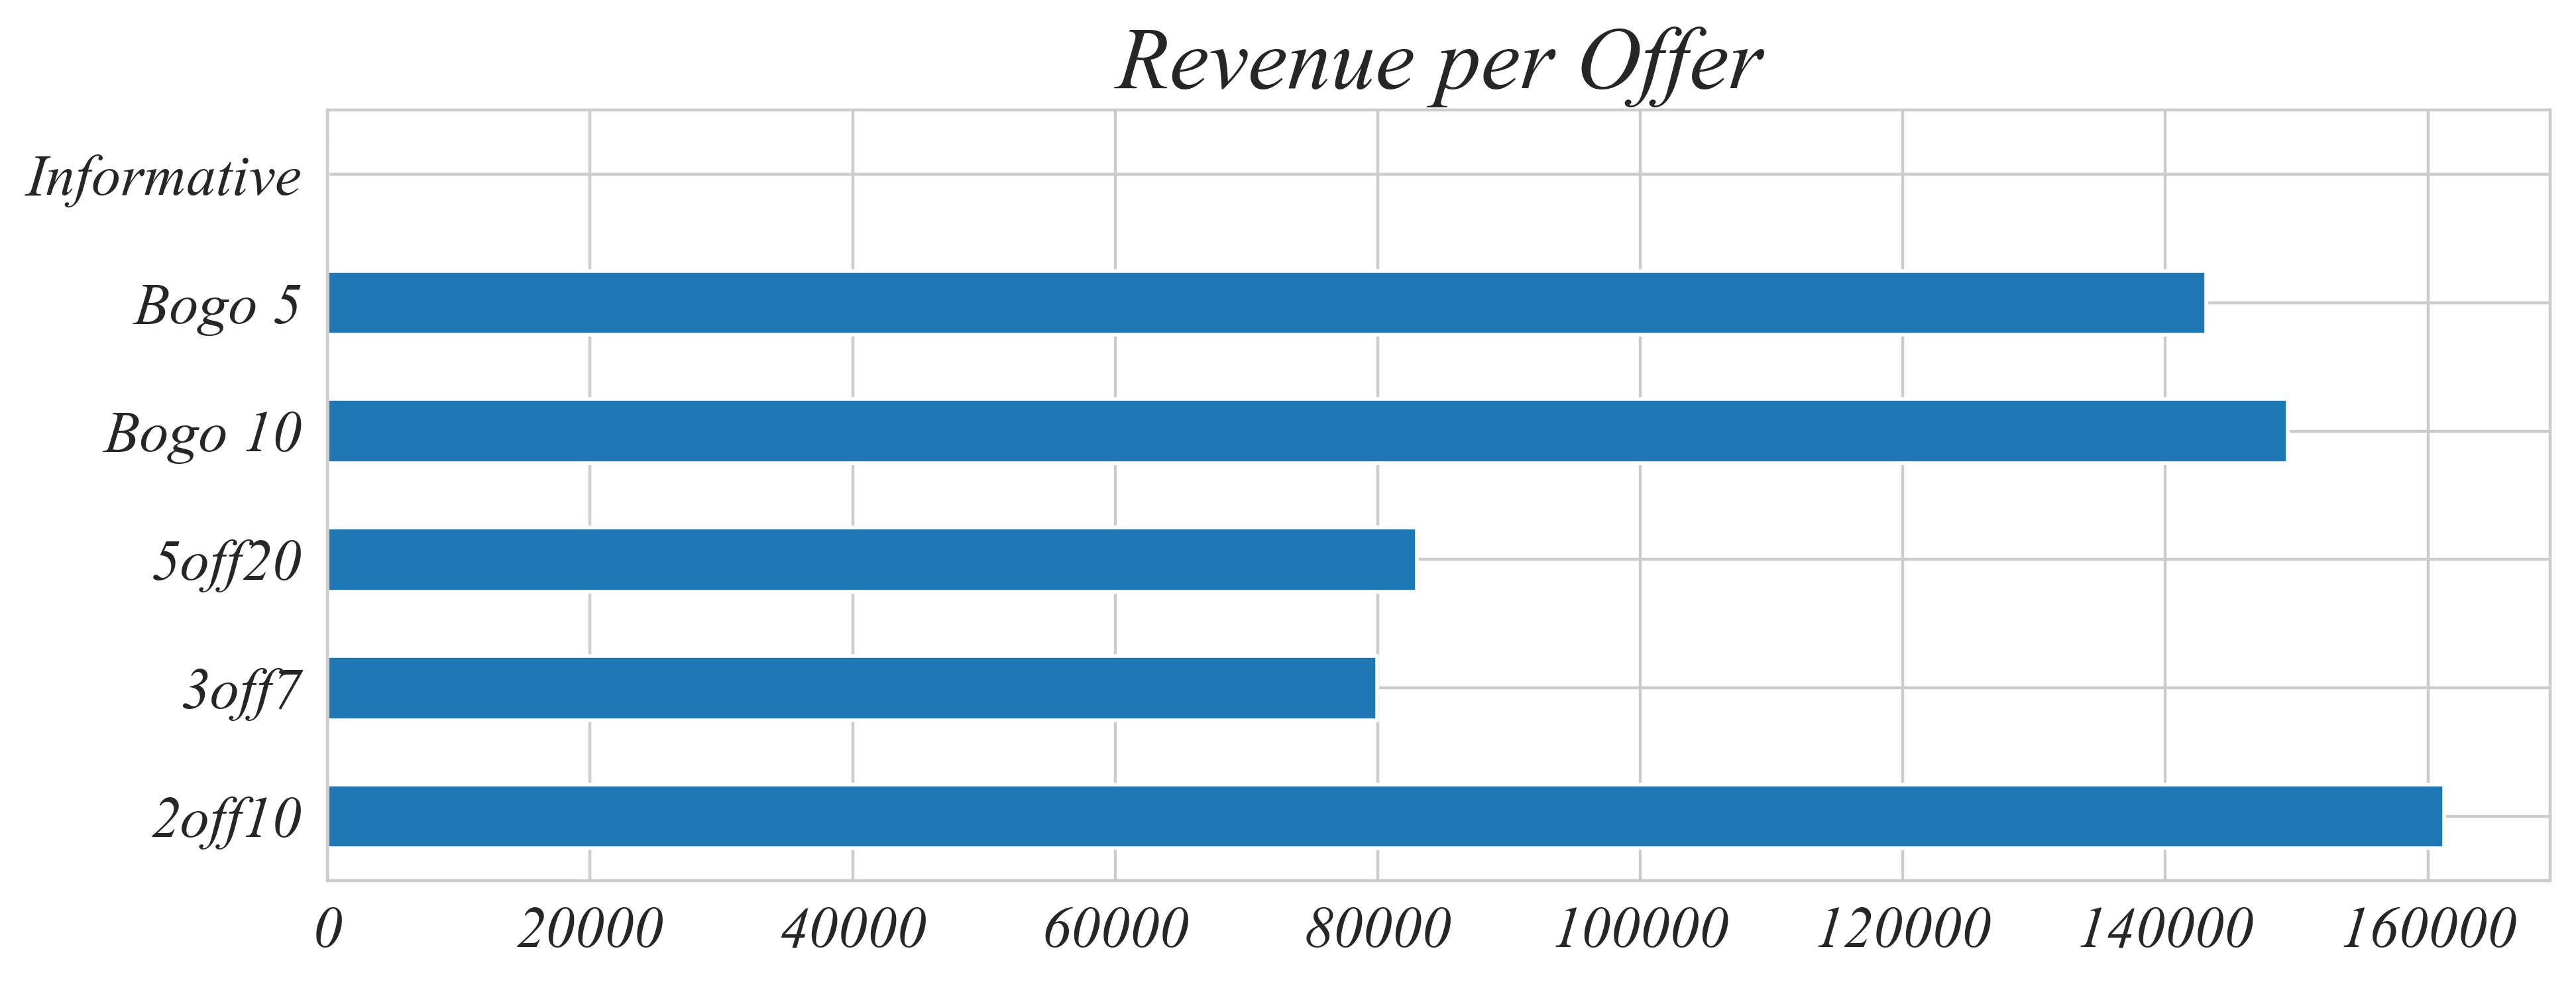

In [58]:
fig, axes = Weid_Fig(height=4, fontsize=24)

grouped_revenue.plot(kind='barh', title="Revenue per Offer")
plt.ylabel('')

plt.tight_layout()
plt.savefig('Part_1_6/i/1.png')

In [35]:
# Summarize total revenue by 'Event'
event_summary = data.groupby("Event")["Revenue"].sum()

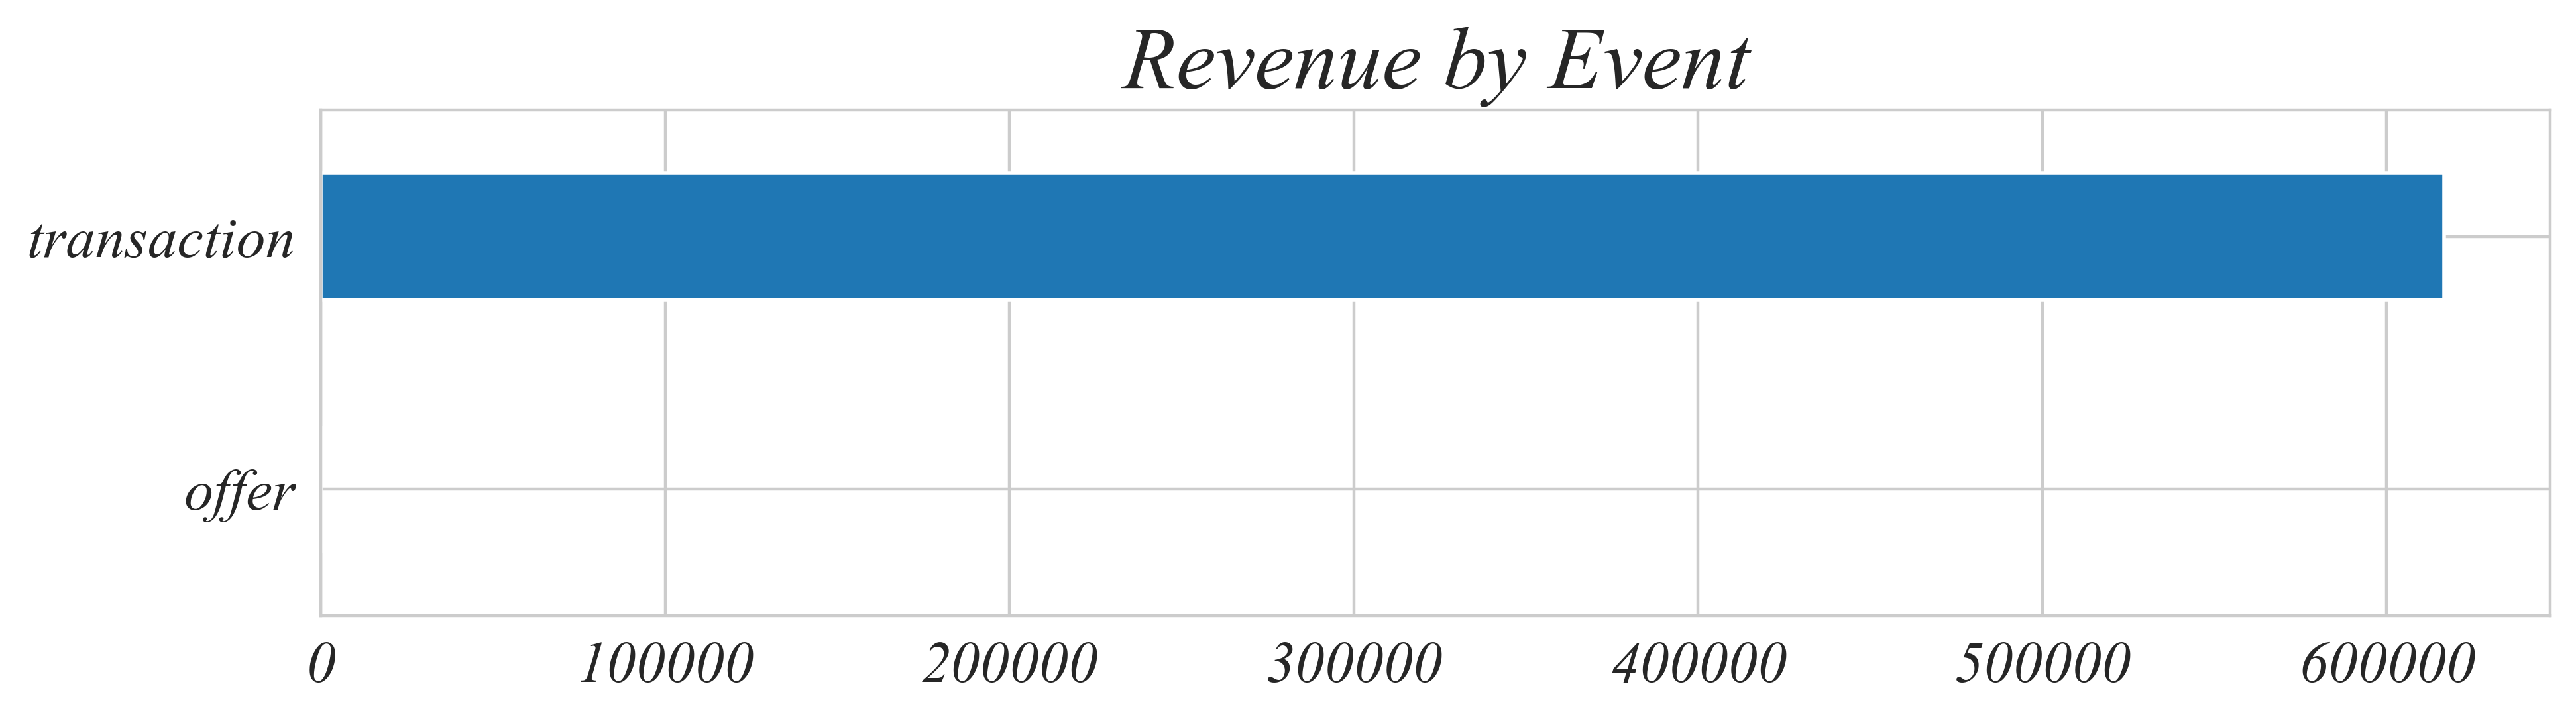

In [57]:
fig, axes = Weid_Fig(height=3, fontsize=24)

event_summary.plot(kind='barh', title="Revenue by Event")
plt.ylabel('')
plt.tight_layout()
plt.savefig('Part_1_6/i/2.png')

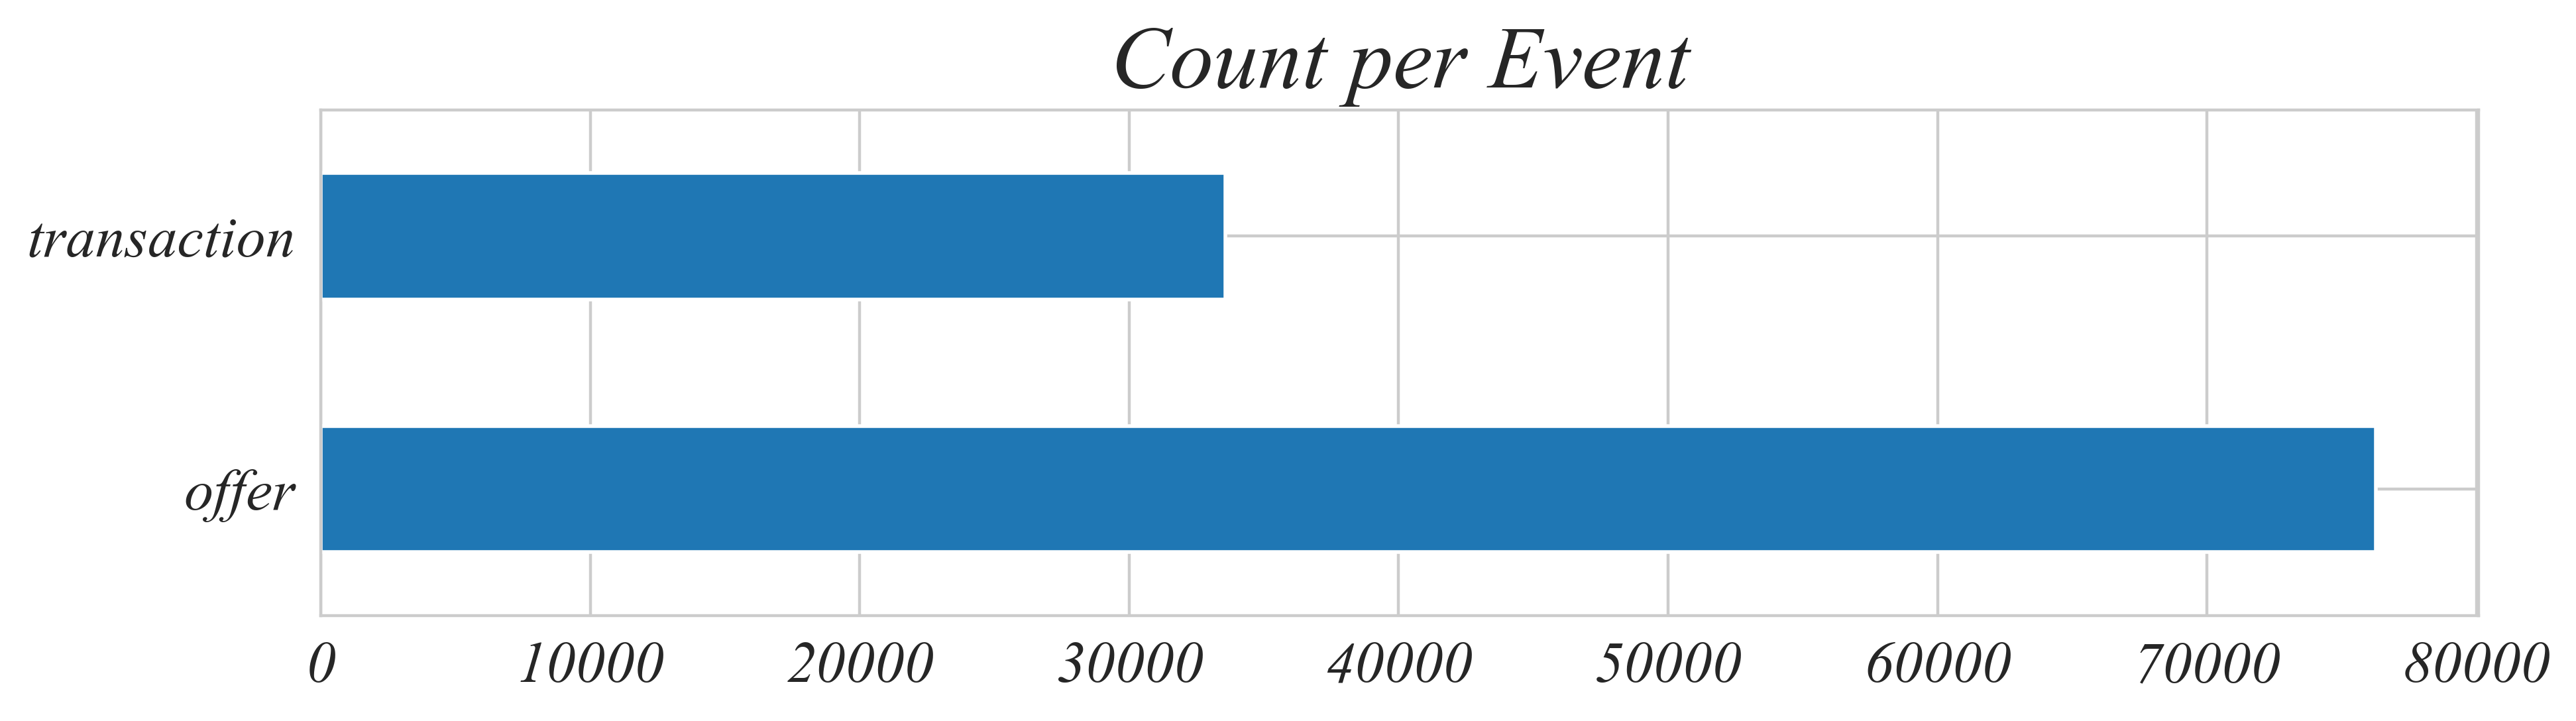

In [56]:
# Count number of each event
event_count = data.groupby("Event")["Event"].count()

fig, axes = Weid_Fig(height=3, fontsize=24)

event_count.plot(kind='barh', title="Count by Event")
plt.ylabel('')
plt.tight_layout()
plt.savefig('Part_1_6/i/3.png')

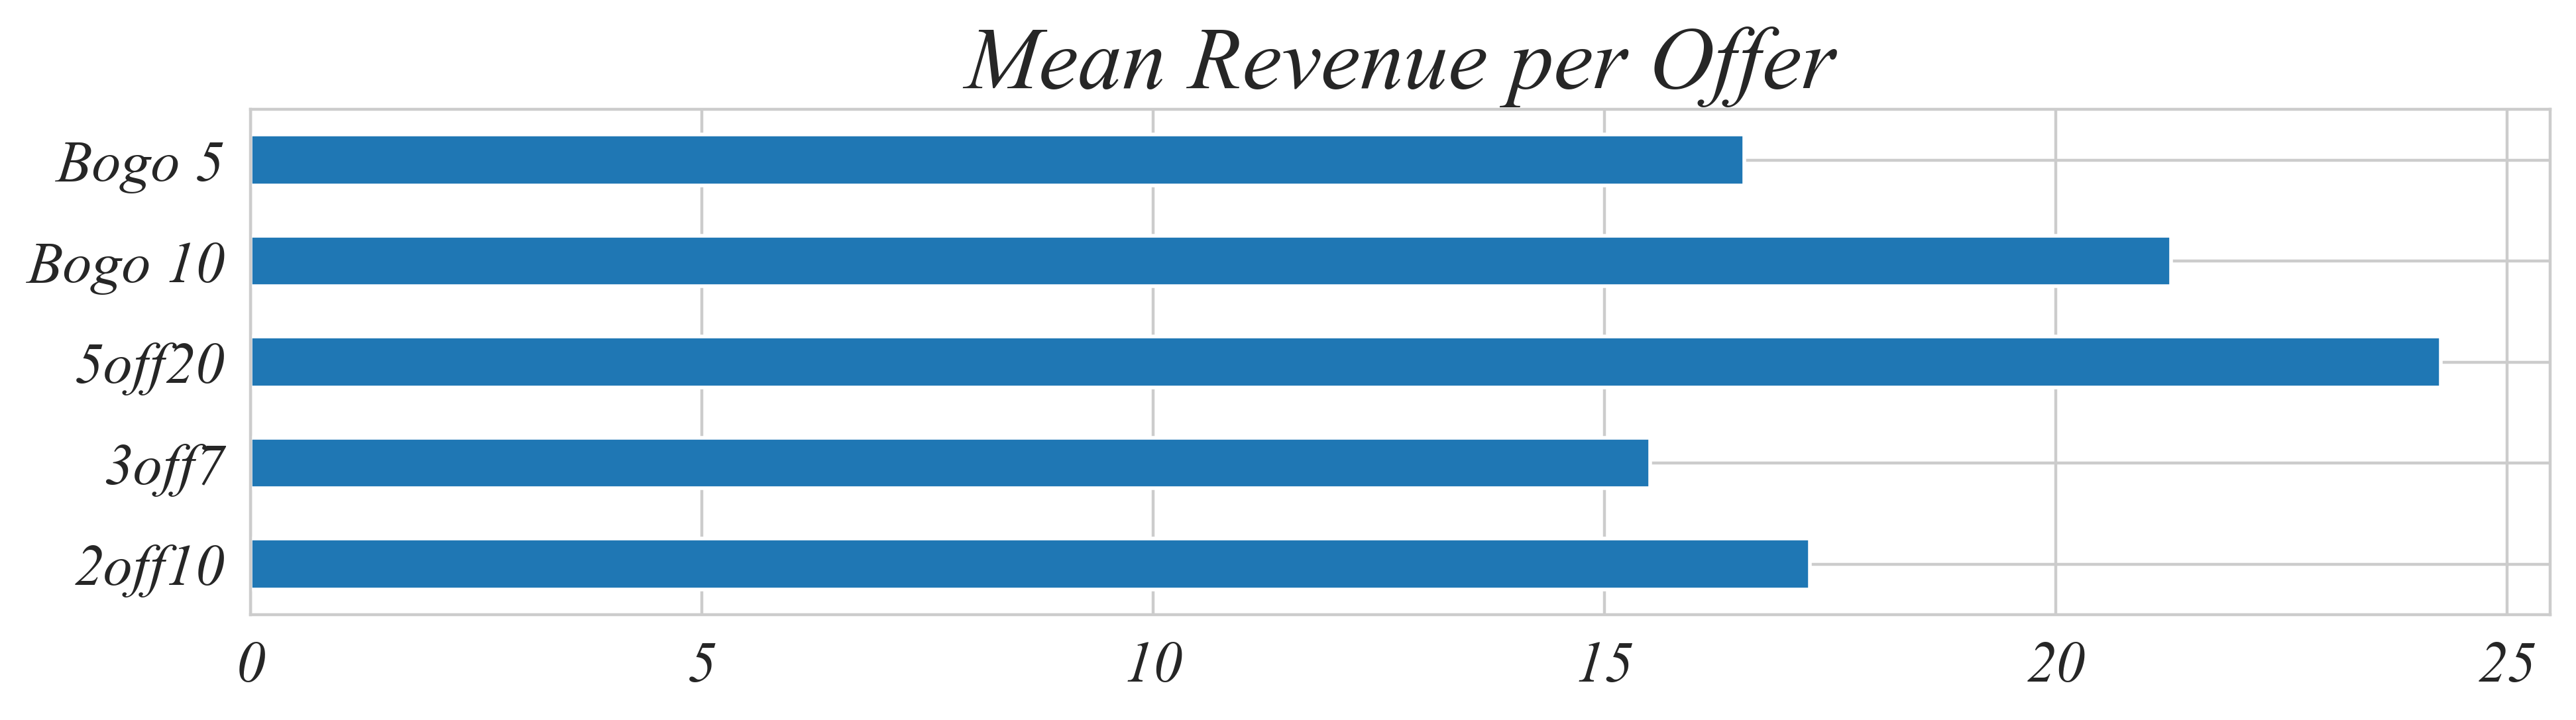

In [4]:
# Filter for transactions only
transactions_only = data[data["Event"] == "transaction"]
# Group by Offer ID
transaction_groups = transactions_only.groupby("Offer ID")
# Take the mean revenue
mean_revenue = transaction_groups["Revenue"].mean()

fig, axes = Weid_Fig(height=3, fontsize=24)

mean_revenue.plot(kind='barh', title="Mean Revenue per Offer")
plt.ylabel('')
plt.tight_layout()
plt.savefig('Part_1_6/i/4.png')

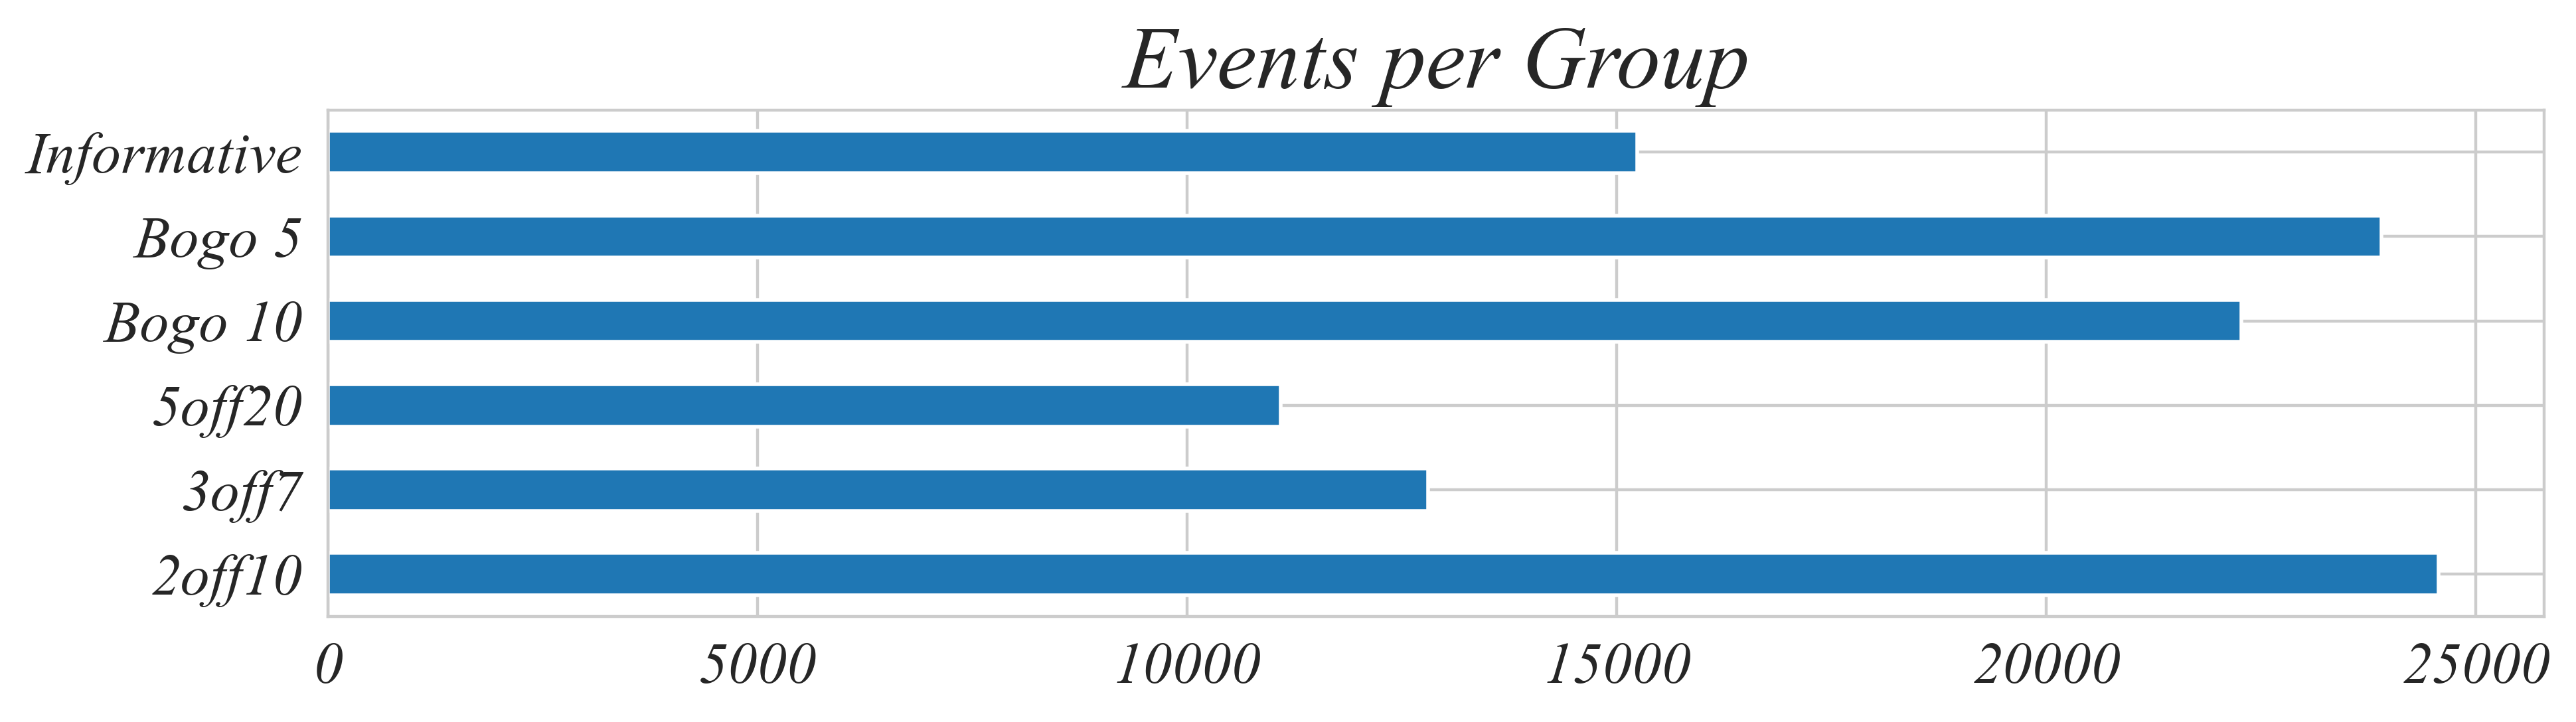

In [20]:
# Events by Offer ID
events_count = data.groupby("Offer ID")["Event"].count()

fig, axes = Weid_Fig(height=3, fontsize=24)

events_count.plot(kind='barh', title="Events per Group")
plt.ylabel('')
plt.tight_layout()
plt.savefig('Part_1_6/i/4_1.png')

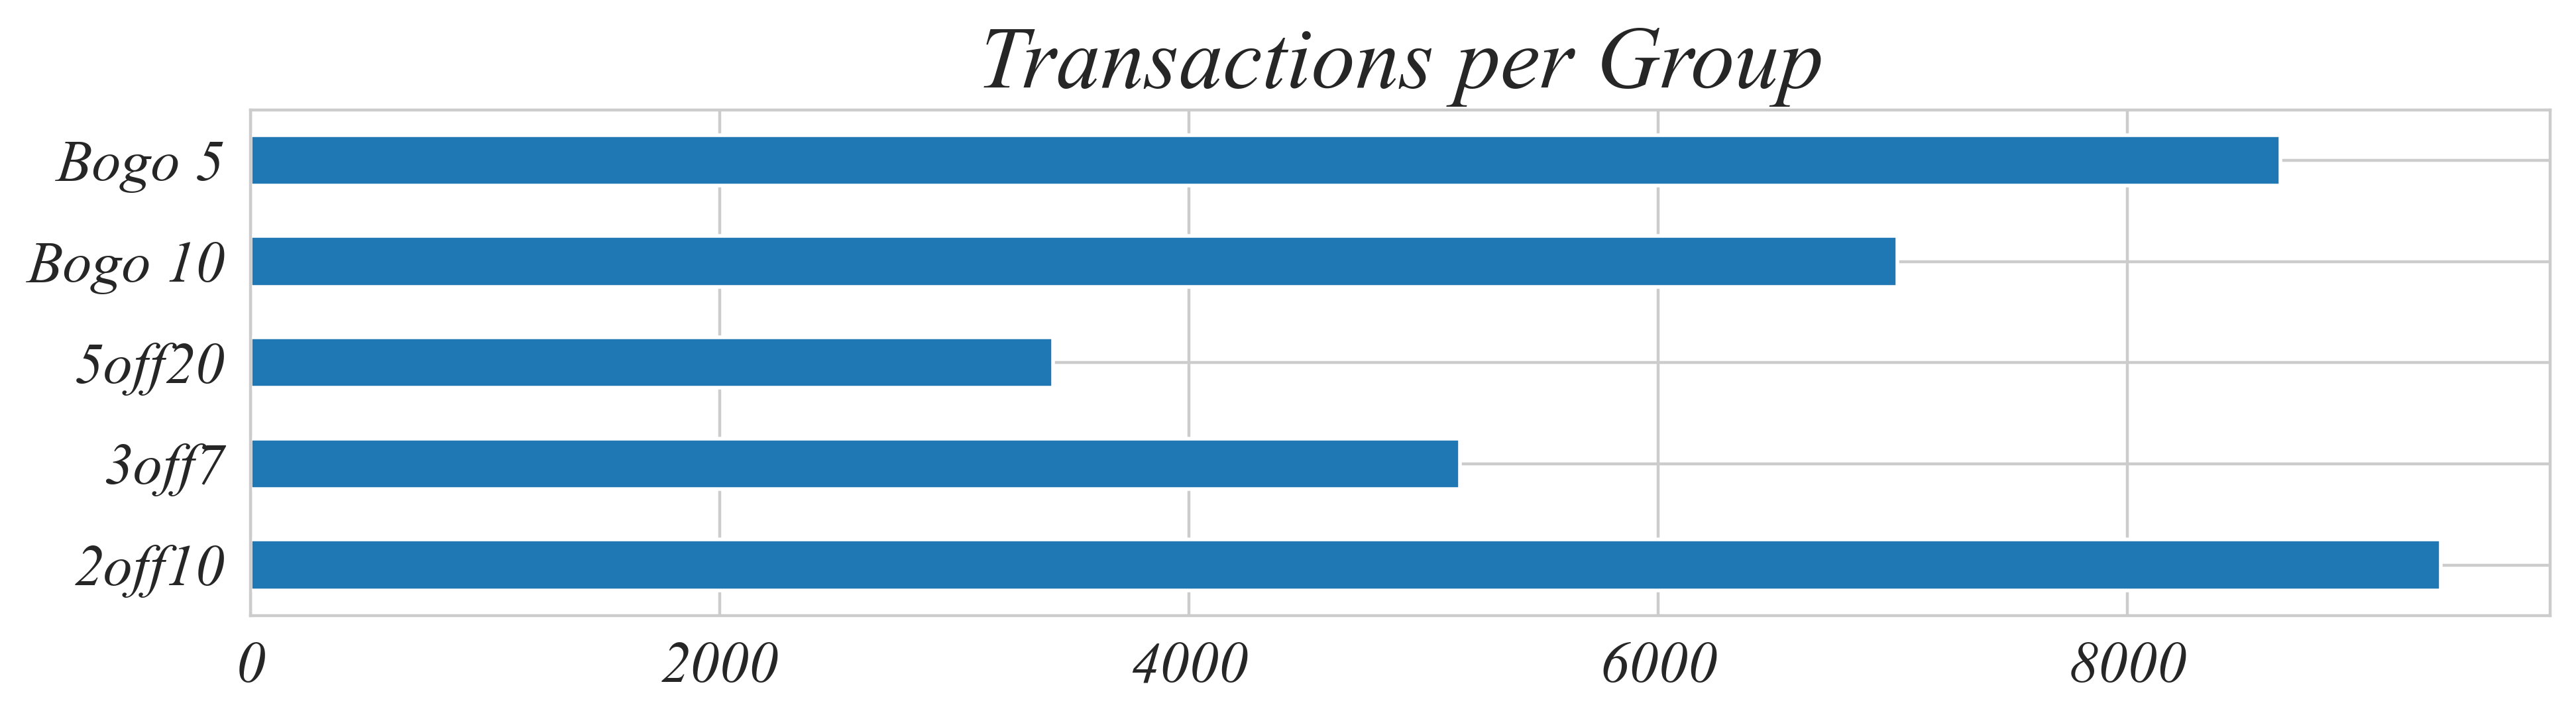

In [12]:
# Count transactions by Offer ID
transactions_only = data[data["Event"] == "transaction"] # Filter for Transaction
transactions_count = transactions_only.groupby("Offer ID")["Event"].count()

fig, axes = Weid_Fig(height=3, fontsize=24)

transactions_count.plot(kind='barh', title="Transactions per Group")
plt.ylabel('')
plt.tight_layout()
plt.savefig('Part_1_6/i/4_2.png')

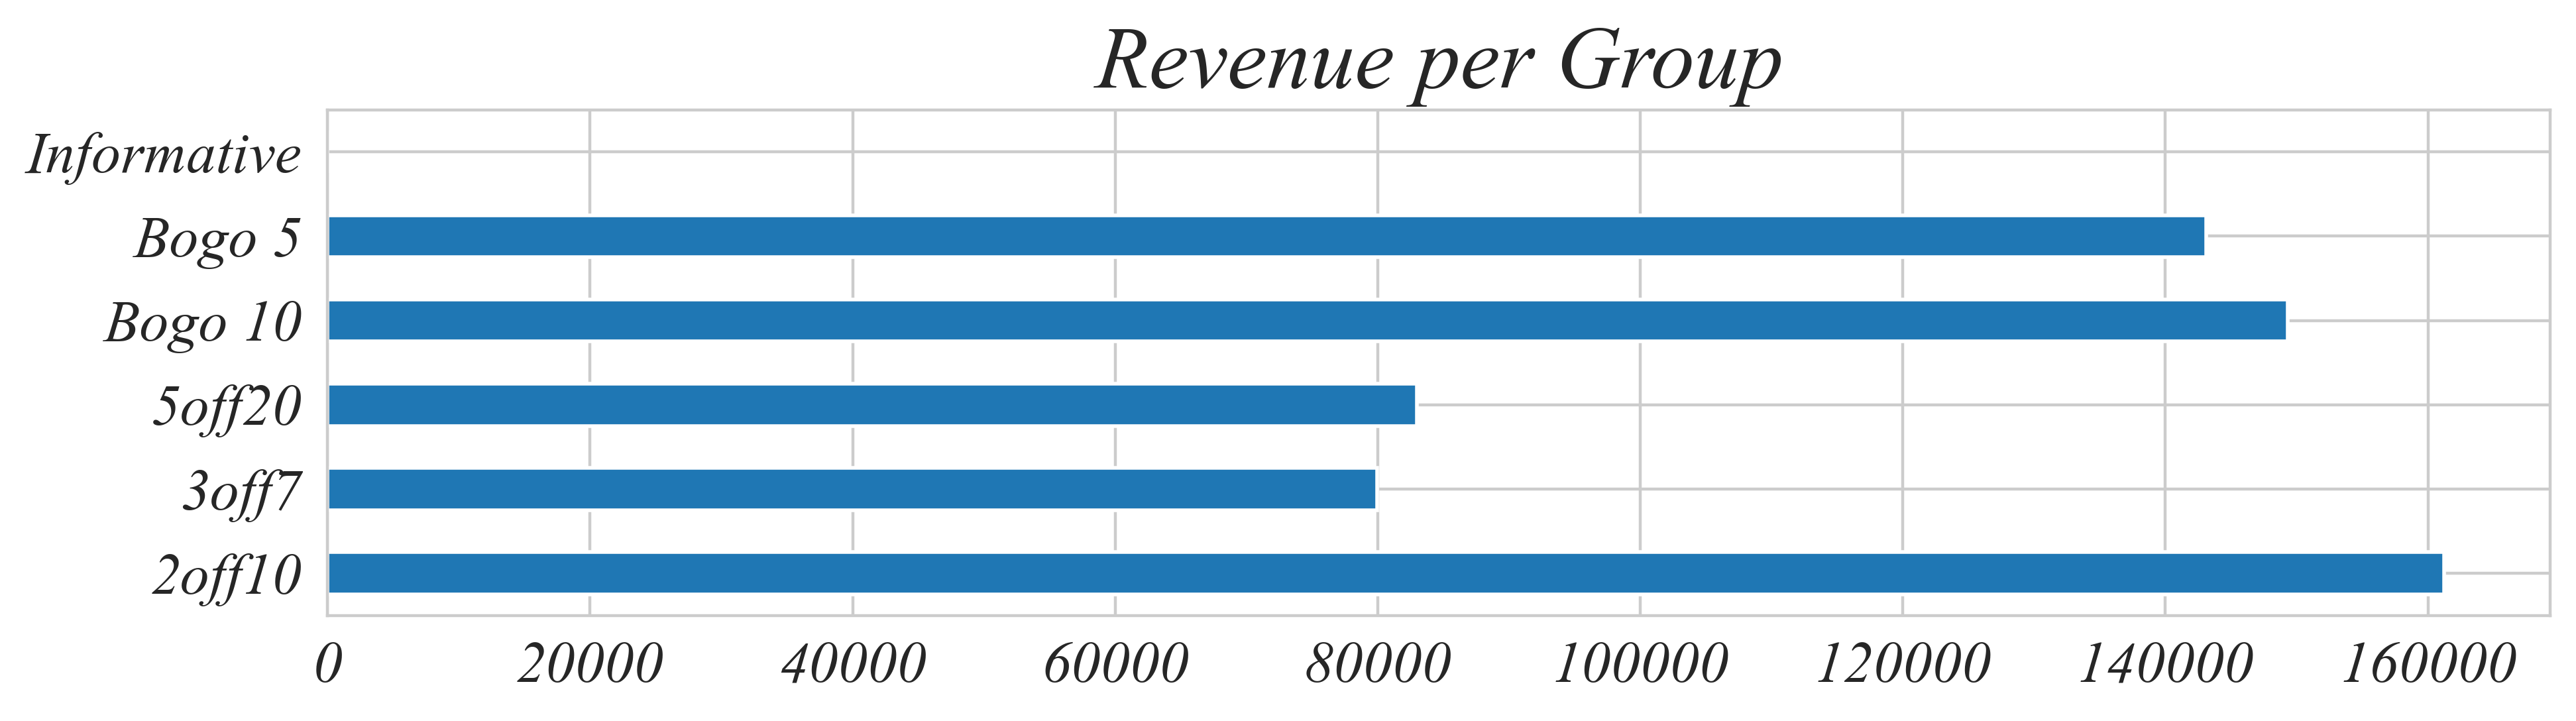

In [14]:
# Sum revenue by Offer ID
grouped_revenue = data.groupby("Offer ID")["Revenue"].sum()

fig, axes = Weid_Fig(height=3, fontsize=24)

grouped_revenue.plot(kind='barh', title="Revenue per Group")
plt.ylabel('')
plt.tight_layout()
plt.savefig('Part_1_6/i/4_3.png')

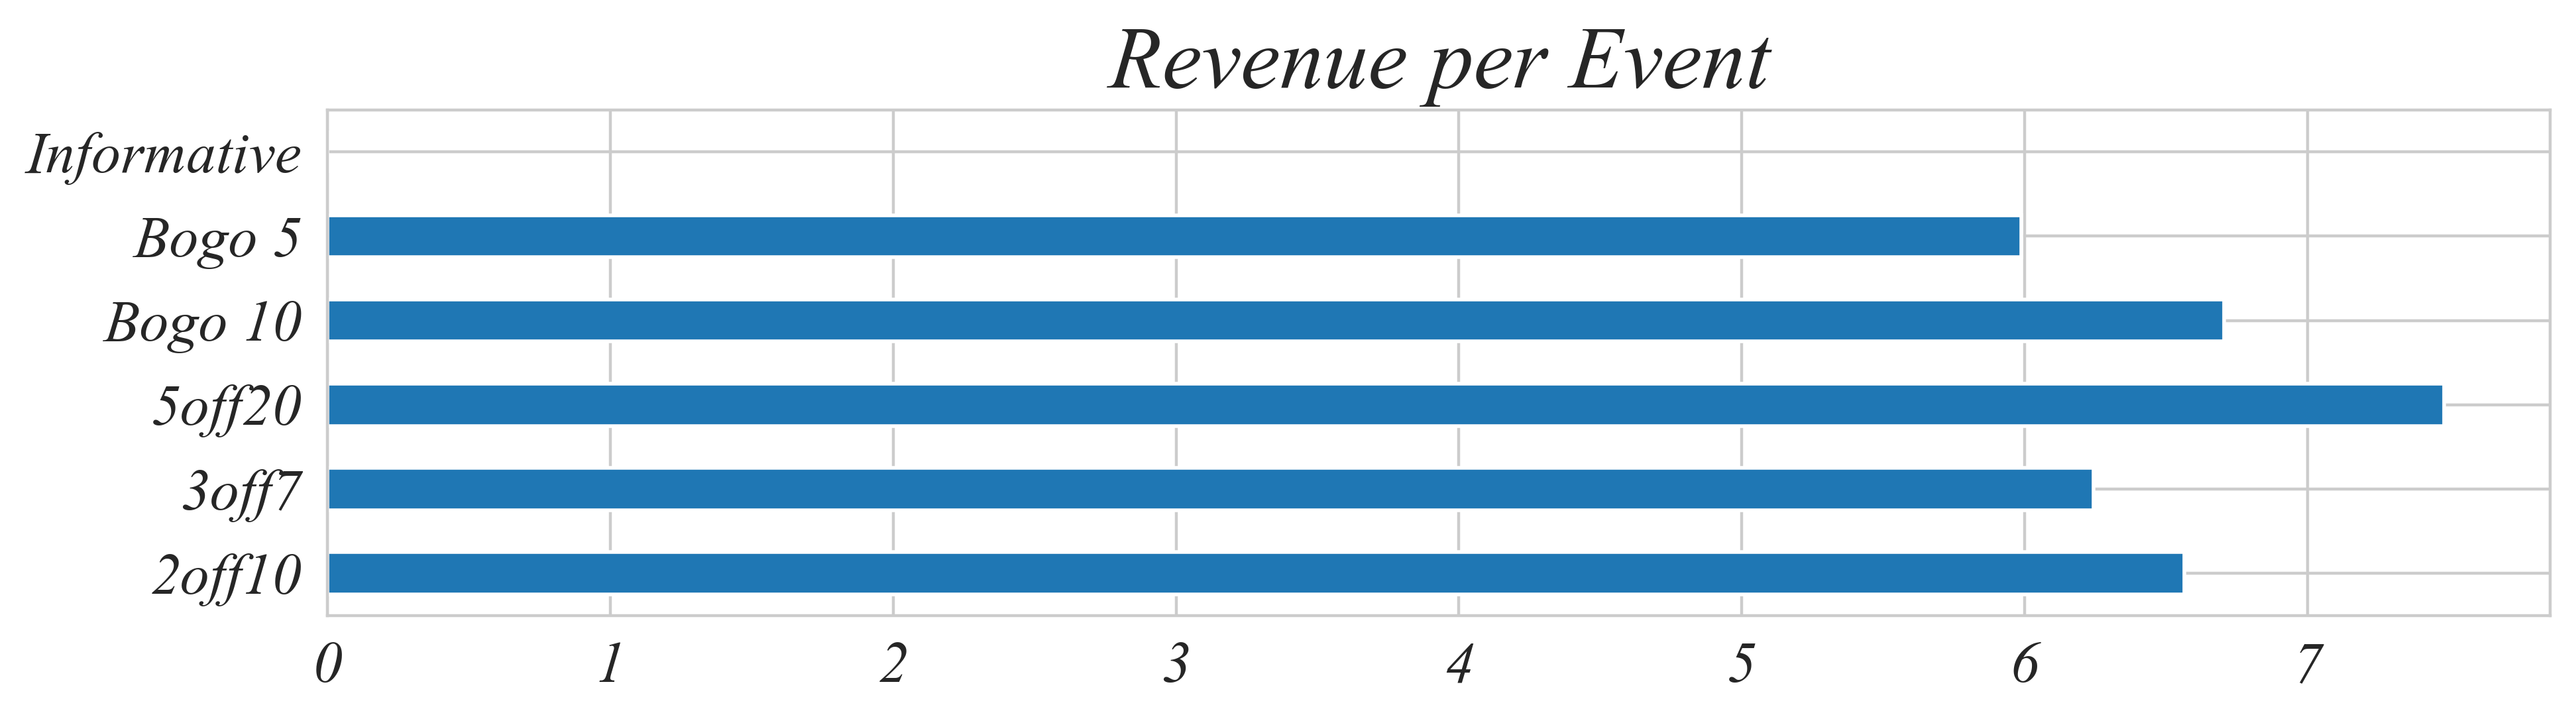

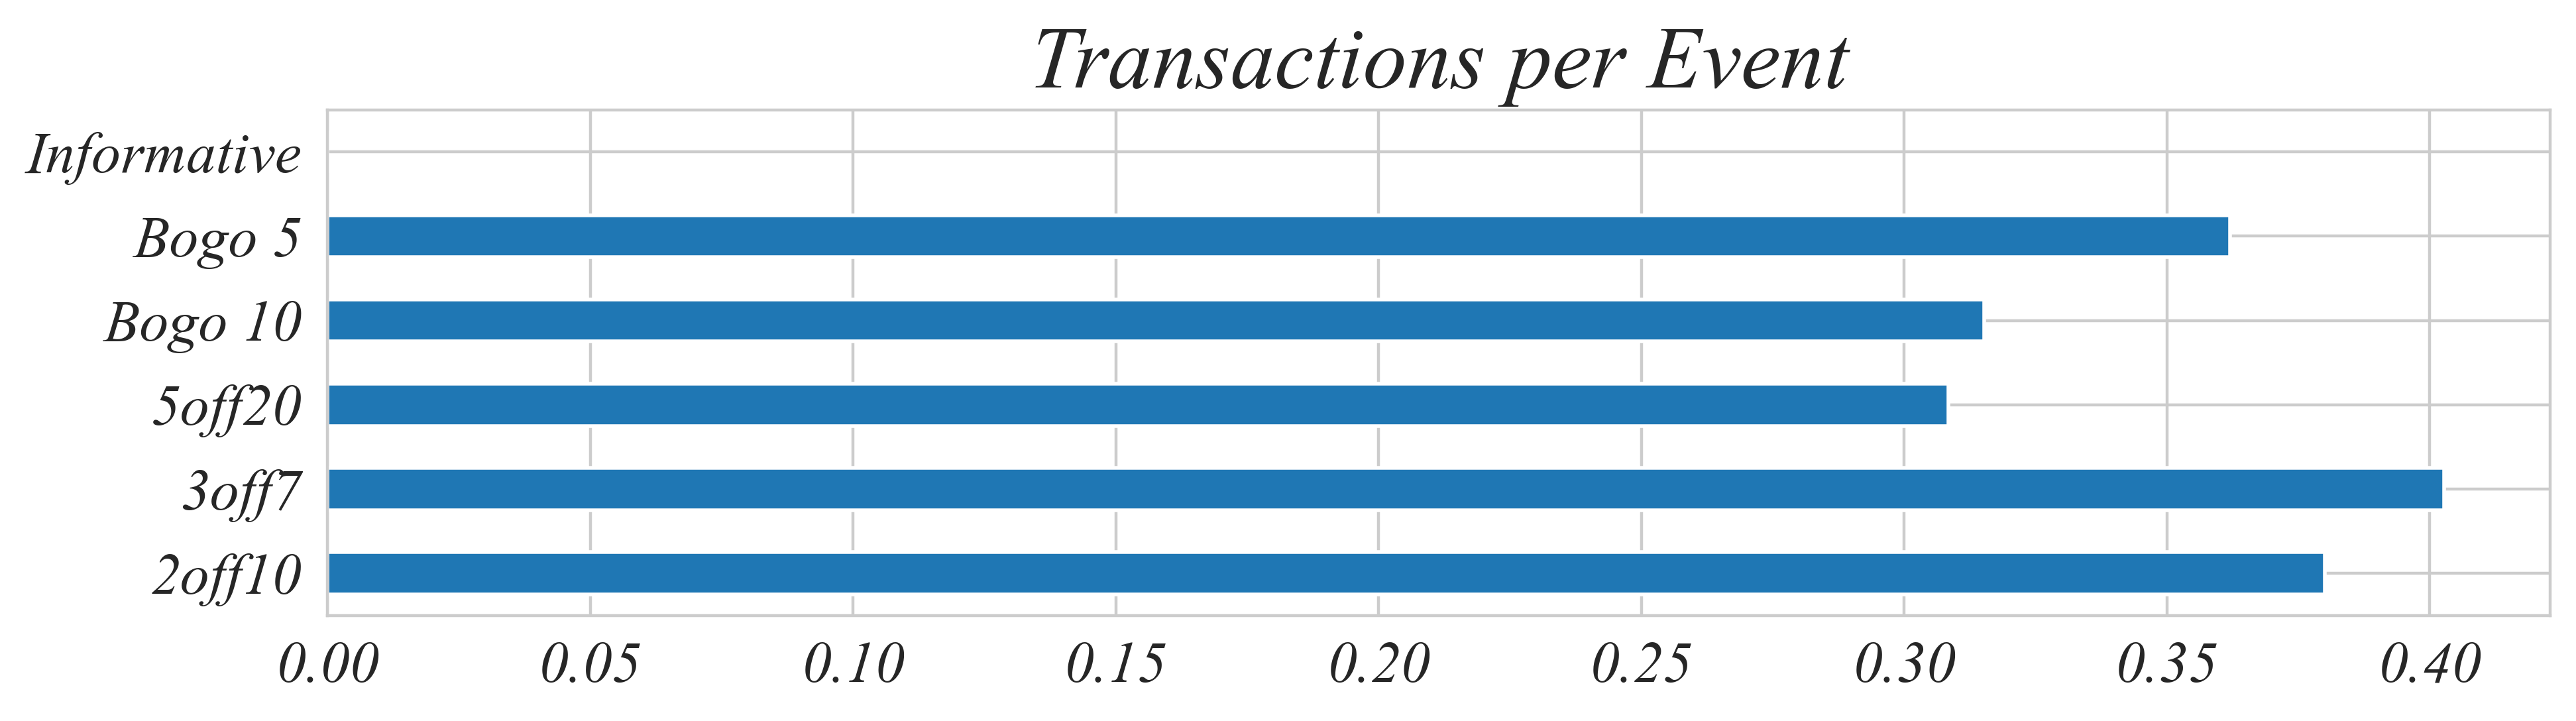

In [16]:
summary = pd.DataFrame({
    "Offers": events_count,
    "Transactions": transactions_count,
    "Revenue": grouped_revenue
})

# Create a "Revenue per Offer" column
summary["Revenue_per_Offer"] = summary["Revenue"] / summary["Offers"]

# Create a "Transactions per Offer" column
summary["Transactions_per_Offer"] = summary["Transactions"] / summary["Offers"]

fig, axes = Weid_Fig(height=3, fontsize=24)

# Plot revenue per offer
summary["Revenue_per_Offer"].plot(kind='barh', title="Revenue per Event")

plt.ylabel('')
plt.tight_layout()
plt.savefig('Part_1_6/i/5.png')

fig, axes = Weid_Fig(height=3, fontsize=24)

# Plot revenue per offer
summary["Transactions_per_Offer"].plot(kind='barh', title="Transactions per Event")

plt.ylabel('')
plt.tight_layout()
plt.savefig('Part_1_6/i/6.png')

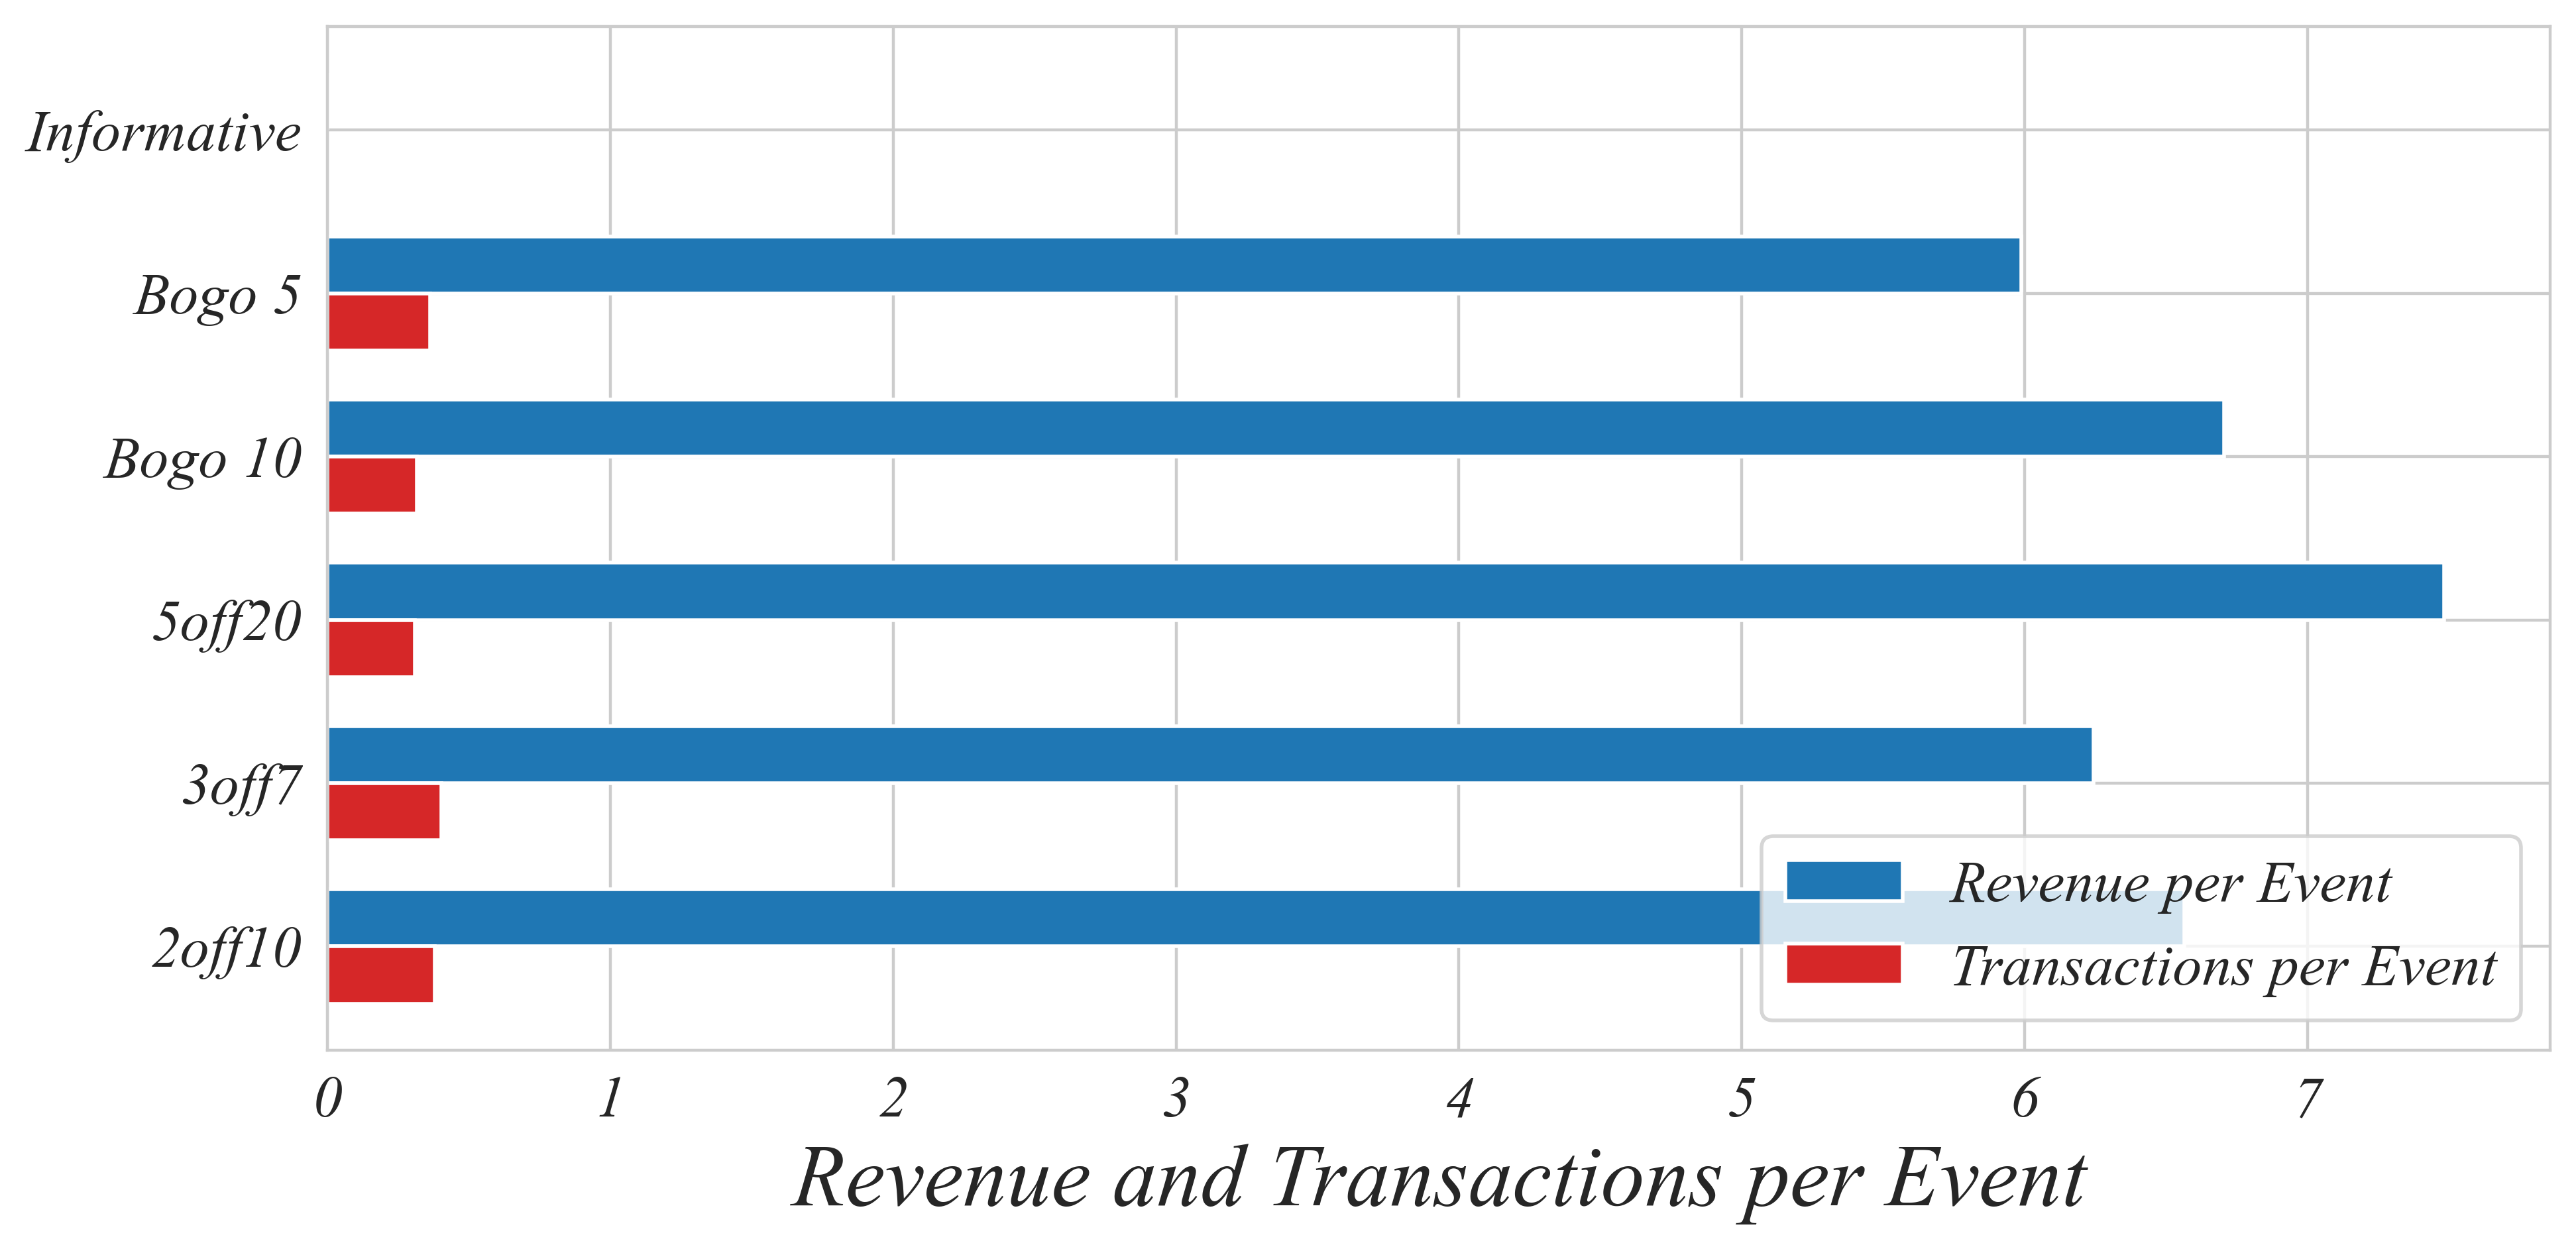

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = Weid_Fig(height=5, fontsize=24)

# Get positions for bars
labels = summary.index
x = np.arange(len(labels))
width = 0.35  # Width of bars

# Create bars
plt.barh(x + width/2, summary['Revenue_per_Offer'], width, label='Revenue per Event', color='#1f77b4')
plt.barh(x - width/2, summary['Transactions_per_Offer'], width, label='Transactions per Event', color='#d62728')

# Customize plot
plt.xlabel('Revenue and Transactions per Event')
plt.yticks(x, labels)
plt.legend()

# Adjust layout
plt.tight_layout()

plt.savefig('Part_1_6/i/5_6_a.png')

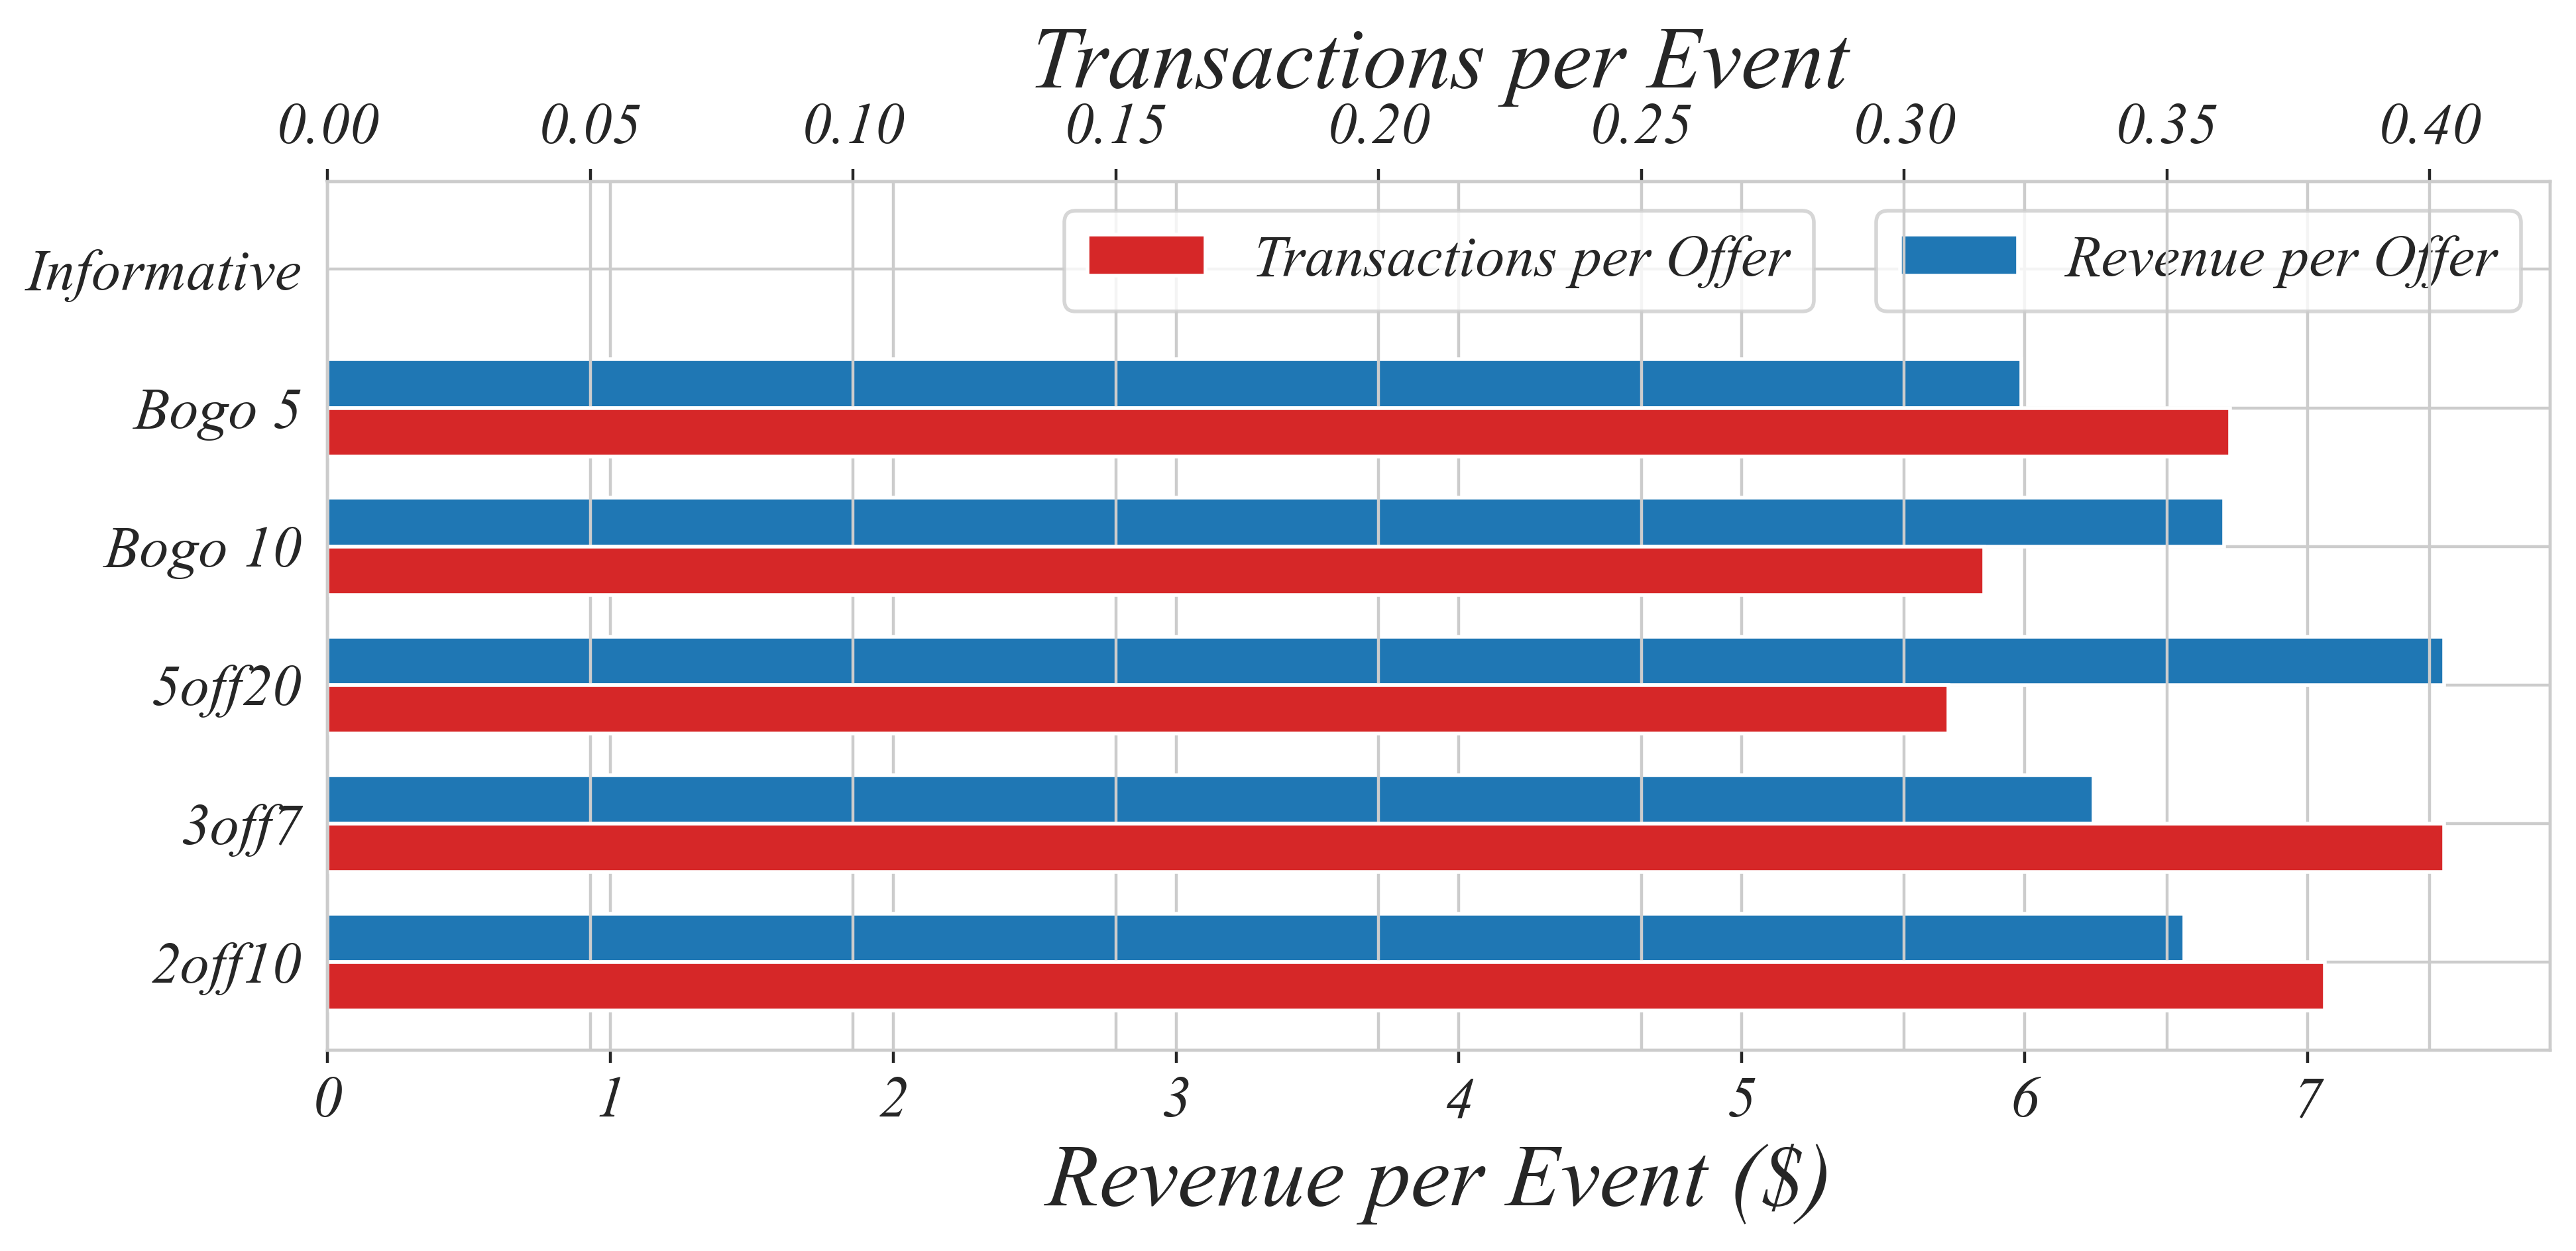

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Set figure size
fig, ax1 = Weid_Fig(height=5, fontsize=24)


# Create second axis that shares the same y-axis
ax2 = ax1.twiny()

# Get positions for bars
labels = summary.index
x = np.arange(len(labels))
width = 0.35

# Create bars on each axis
ax1.barh(x + width/2, summary['Revenue_per_Offer'], width, 
         label='Revenue per Offer', color='#1f77b4')
ax2.barh(x - width/2, summary['Transactions_per_Offer'], width,
         label='Transactions per Offer', color='#d62728')

# Customize first axis (Revenue)
ax1.set_xlabel('Revenue per Event ($)')
ax1.set_yticks(x)
ax1.set_yticklabels(labels)

# Customize second axis (Transactions)
ax2.set_xlabel('Transactions per Event')

# Add title and legend
#plt.title('Revenue and Transactions per Offer', pad=20)
ax1.legend(loc='upper right')
ax2.legend(loc='upper center')

# Adjust layout
plt.tight_layout()

plt.savefig('Part_1_6/i/5_6_b.png')